In [ ]:
%run Import_Library.ipynb

In [ ]:
%run Accessory_Functions.ipynb

## Dataset Structure

In [174]:
# Load dataset into pandas dataframe
data = pd.read_csv('data/spam.csv', sep='\t', 
                        header=None, names=["label", "text"])  



data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
label    5572 non-null object
text     5572 non-null object
dtypes: object(2)
memory usage: 87.2+ KB


Print first 5 lines

In [175]:
data.head()

,label,text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [176]:
data['label'].unique()

array(['ham', 'spam'], dtype=object)

**The best way to understand the data and to engineer features is to raise questions and to answer them**

**1) What percentage of the documents in spam_data are spam?**

In [177]:
print(round((len(data[data['label'] == 'spam'])/len(data))*100, 2) ,"%")

13.41 %


**2) What is the longest text?**

In [178]:
data['len_text'] = data['text'].apply(lambda x : len(x))

data.head()

,label,text,len_text
0,ham,"Go until jurong point, crazy.. Available only ...",111
1,ham,Ok lar... Joking wif u oni...,29
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,ham,U dun say so early hor... U c already then say...,49
4,ham,"Nah I don't think he goes to usf, he lives aro...",61


In [179]:
data.sort_values(by = ['len_text'], ascending = False)[:5]

,label,text,len_text
1085,ham,For me the love should start with attraction.i...,910
1863,ham,The last thing i ever wanted to do was hurt yo...,790
2434,ham,Indians r poor but India is not a poor country...,629
1579,ham,How to Make a girl Happy? It's not at all diff...,611
2158,ham,Sad story of a Man - Last week was my b'day. M...,588


**3) What is the average length of documents (number of characters) for not spam and spam documents?**

In [180]:
avg_len_spam = data[data['label'] == 'spam']['len_text'].mean()

avg_len_ham = data[data['label'] == 'ham']['len_text'].mean()

print('Average length of spam documents: ', avg_len_spam)

print('Average length of ham documents: ', avg_len_ham)

Average length of spam documents:  138.6706827309237
Average length of ham documents:  71.48290155440415


**4) What is the average number of digits per document for not spam and spam documents?**


In [181]:
# regular expression for finding the digits
num_re = re.compile('[0-9]')

# count the number of digits in each text
data['digits'] = data['text'].apply( lambda msg : len(num_re.findall(msg)))

avg_digits_spam =  data[data['label'] == 'spam']['digits'].mean()

avg_digits_ham =  data[data['label'] == 'ham']['digits'].mean()

print('Average length of spam documents: ', avg_digits_spam)

print('Average length of ham documents: ', avg_digits_ham)

Average length of spam documents:  15.812583668005354
Average length of ham documents:  0.30528497409326427


**Observation**
In average, spam messages contain more digit characters than non-spam messages

**5) What is the average number of non-word characters (anything other than a letter, digit or underscore) per document for not spam and spam documents?**

In [182]:
non_alpha_char_re = re.compile('[^a-zA-Z0-9]')

# count the number of digits in each text
data['non_alpha_char'] = data['text'].apply( lambda msg : len(non_alpha_char_re.findall(msg)))

avg_non_alpha_char_spam =  data[data['label'] == 'spam']['non_alpha_char'].mean()

avg_non_alpha_char_ham =  data[data['label'] == 'ham']['non_alpha_char'].mean()

print('Average length of spam documents: ', avg_non_alpha_char_spam)

print('Average length of ham documents: ', avg_non_alpha_char_ham)

Average length of spam documents:  29.109772423025436
Average length of ham documents:  17.436683937823833


**Observation** In average, spam messages contain more non alphameric characters than non-spam messages

**6) What are top 20 highest frequency words of spam and non-spam messages ?**

In [183]:
# Get all text of spam messages. It return a list of text
spam = data[data['label'] == 'spam']['text'].values
# Use join() to convert list/array into string
spam = ' '.join(spam)
# Get frequency of individual token in the text and pick top n highest frequent words
top_20_words_spam = top_word_frequency(spam, 20)
top_20_words_spam

[('.', 902),
 ('to', 690),
 ('!', 545),
 (',', 378),
 ('a', 377),
 ('call', 346),
 ('you', 297),
 ('your', 263),
 ('free', 217),
 ('the', 206),
 ('for', 203),
 ('now', 199),
 ('or', 188),
 ('&', 178),
 ('?', 175),
 ('2', 174),
 (':', 163),
 ('is', 158),
 ('txt', 156),
 ('on', 145)]

In [184]:
# Get all text of spam messages. It return a list of text
ham = data[data['label'] == 'ham']['text'].values
# Use join() to convert list/array into string
ham = ' '.join(ham)
# Get frequency of individual token in the text and pick top n highest frequent words
top_20_words_ham = top_word_frequency(ham, 20)
top_20_words_ham

[('.', 3798),
 ('i', 2856),
 ('you', 1937),
 ('to', 1562),
 (',', 1560),
 ('?', 1375),
 ('...', 1251),
 ('the', 1130),
 ('a', 1062),
 ('u', 975),
 ('!', 852),
 ('and', 851),
 ('in', 818),
 ('me', 766),
 (';', 766),
 ('my', 748),
 ('is', 746),
 ('&', 744),
 ('it', 684),
 (':', 559)]

## Data Cleaning

- Lower case and remove non-alphameric characters 
- Remove punctuation
- Remove stop words
- Lemmatization
    - Lemmatization, unlike Stemming, reduces the inflected words properly ensuring that the root word belongs to the language. In Lemmatization root word is called Lemma. A lemma (plural lemmas or lemmata) is the canonical form, dictionary form, or citation form of a set of words. (nltk package)
    - Python NLTK provides WordNet Lemmatizer that uses the WordNet Database to lookup lemmas of words.
- Tokenize each message into a list of seperated tokens

In [185]:
data['processed_text'] = data['text'].map(preprocessing)
#data['processed_text'] = data['processed_text'].map(word_tokenize)

In [186]:
data.head()

,label,text,len_text,digits,non_alpha_char,processed_text
0,ham,"Go until jurong point, crazy.. Available only ...",111,0,28,go jurong point crazy available bugis n great ...
1,ham,Ok lar... Joking wif u oni...,29,0,11,ok lar joking wif u oni
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155,25,33,free entry 2 wkly comp win fa cup final tkts 2...
3,ham,U dun say so early hor... U c already then say...,49,0,16,u dun say early hor u c already say
4,ham,"Nah I don't think he goes to usf, he lives aro...",61,0,14,nah dont think go usf life around though


**Baseline Accurary**


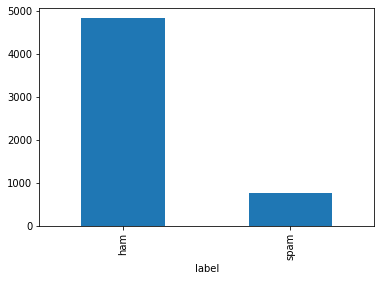

In [187]:
data.groupby('label').text.count().plot.bar(ylim=0)

In [188]:
print("Baseline accurarcy:" , round((len(data[data['label'] == 'ham'])/len(data)), 2))

Baseline accurarcy: 0.87


- The baseline accuracy is important but often ignored in machine learning. It sets the benchmark in terms of minimum accuracy which the model should achieve. Baseline is calculated as the number of times majority class (ham) appear in the target variable (label colum), divided by the number of total observations.
- In our case, baseline accurary achieved 87%

**The distribution of length of message in dataset**

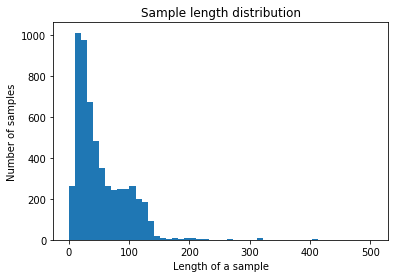

In [196]:
def plot_sample_length_distribution(sample_texts):
    """Plots the sample length distribution.

    # Arguments
        samples_texts: list, sample texts.
    """
    plt.hist([len(s) for s in sample_texts], 50)
    plt.xlabel('Length of a sample')
    plt.ylabel('Number of samples')
    plt.title('Sample length distribution')
    plt.show()

plot_sample_length_distribution(data['processed_text'].values)

In [202]:
top_20_words = top_word_frequency(' '.join(data['processed_text'].values), 20)
top_20_words

[('u', 1195),
 ('get', 698),
 ('call', 655),
 ('go', 554),
 ('2', 482),
 ('im', 473),
 ('ur', 390),
 ('come', 326),
 ('dont', 298),
 ('4', 293),
 ('know', 281),
 ('ok', 278),
 ('ltgt', 276),
 ('free', 275),
 ('like', 253),
 ('good', 247),
 ('send', 244),
 ('ill', 243),
 ('day', 242),
 ('want', 238)]

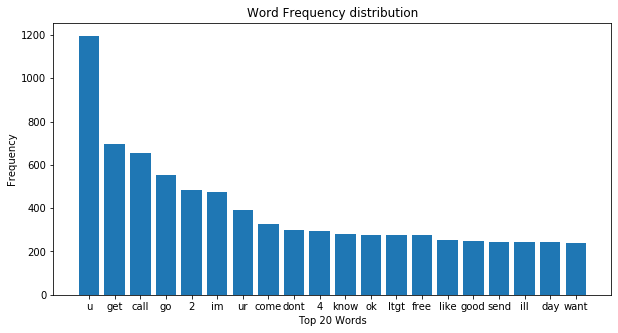

In [210]:
def plot_word_frequency_distribution(sample_texts):

    top_20_words = top_word_frequency(sample_texts, 20)
    
    words = []
    frequency = []

    for word, freq in top_20_words:
        words.append(word)
        frequency.append(freq)

    plt.figure(figsize=(10, 5))
    plt.bar(words, frequency)
    plt.xlabel('Top 20 Words')
    plt.ylabel('Frequency')
    plt.title('Word Frequency distribution')
    plt.show()

plot_word_frequency_distribution(' '.join(data['processed_text'].values))

In [190]:
from joblib import dump

dump(data, 'data.lib')

data.head()

,label,text,len_text,digits,non_alpha_char,processed_text
0,ham,"Go until jurong point, crazy.. Available only ...",111,0,28,go jurong point crazy available bugis n great ...
1,ham,Ok lar... Joking wif u oni...,29,0,11,ok lar joking wif u oni
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155,25,33,free entry 2 wkly comp win fa cup final tkts 2...
3,ham,U dun say so early hor... U c already then say...,49,0,16,u dun say early hor u c already say
4,ham,"Nah I don't think he goes to usf, he lives aro...",61,0,14,nah dont think go usf life around though


In [191]:
from joblib import load

test_joblib = load('data.lib')

test_joblib.head()

,label,text,len_text,digits,non_alpha_char,processed_text
0,ham,"Go until jurong point, crazy.. Available only ...",111,0,28,go jurong point crazy available bugis n great ...
1,ham,Ok lar... Joking wif u oni...,29,0,11,ok lar joking wif u oni
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155,25,33,free entry 2 wkly comp win fa cup final tkts 2...
3,ham,U dun say so early hor... U c already then say...,49,0,16,u dun say early hor u c already say
4,ham,"Nah I don't think he goes to usf, he lives aro...",61,0,14,nah dont think go usf life around though


In [192]:
data['text'].loc[0]

'Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...'

In [193]:
test_joblib['text'].loc[0]

'Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...'

In [194]:
data['processed_text'].loc[0]

'go jurong point crazy available bugis n great world la e buffet cine get amore wat'

In [195]:
test_joblib['processed_text'].loc[0]

'go jurong point crazy available bugis n great world la e buffet cine get amore wat'